In [1]:
#базовые библиотеки
import numpy as np
import matplotlib.pyplot as plt

## 1) Решение с начальным узлом сетки по точному решению

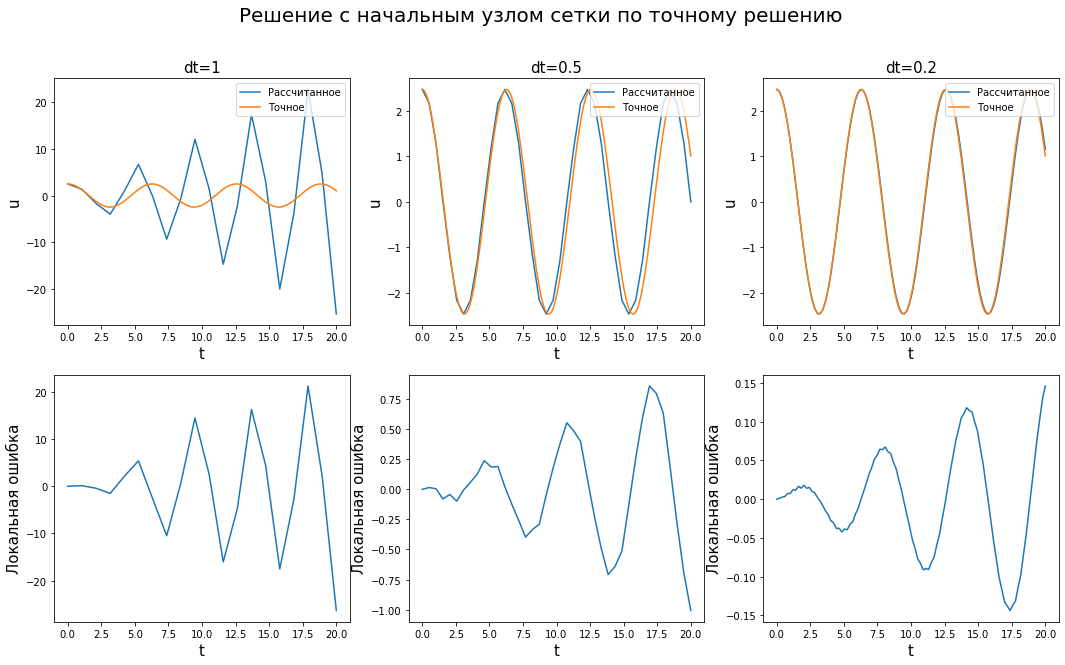

In [2]:
fig, axs = plt.subplots(2, 3)

fig.set_figheight(10)
fig.set_figwidth(18)
fig.suptitle("Решение с начальным узлом сетки по точному решению", fontsize=20)

#задаем аналитическое решение
t_an=np.linspace(0,20,200)
u_an=2.47*np.cos(t_an)

dts=[1,0.5,0.2] #задаем шаг сетки

# Цикл по трем шагам сетки
for j in range(3):
    
    dt=dts[j]
    t=np.linspace(0,20,int(20/dt))
    u=np.zeros(int(20/dt))
    v=np.zeros(int(20/dt))
    e=np.zeros(int(20/dt))
    
    # начальные условия с помощью точного решения
    u[0],v[0]=2.47,0
    u[1],v[1]=2.47*np.cos(dt),-2.47*np.sin(dt)
    
    # двухслойная схема с перешагиванием 
    for i in range(1,len(u)-1):
        u[i+1]=u[i-1]+v[i]*2*dt
        v[i+1]=v[i-1]-u[i]*2*dt
    #локальная ошибка
    e=u-2.47*np.cos(np.linspace(0,20,int(20/dt)))
    
    axs[0,j].plot(t,u,label='Рассчитанное')
    axs[0,j].set_xlabel('t',fontsize=15)
    axs[0,j].set_ylabel('u',fontsize=15)
    axs[0,j].plot(t_an,u_an,label='Точное')
    axs[0,j].set_title("dt="+str(dt),fontsize=15)
    axs[0,j].legend(loc=1)
    
    
    axs[1,j].plot(t,e,label='Рассчитанное')
    axs[1,j].set_xlabel('t',fontsize=15)
    axs[1,j].set_ylabel('Локальная ошибка',fontsize=15)
    


    

## 2) Решение с начальным узлом сетки с одиним шагом по схеме Эйлера

#### Аналогично, только изменение в первом узле сетки

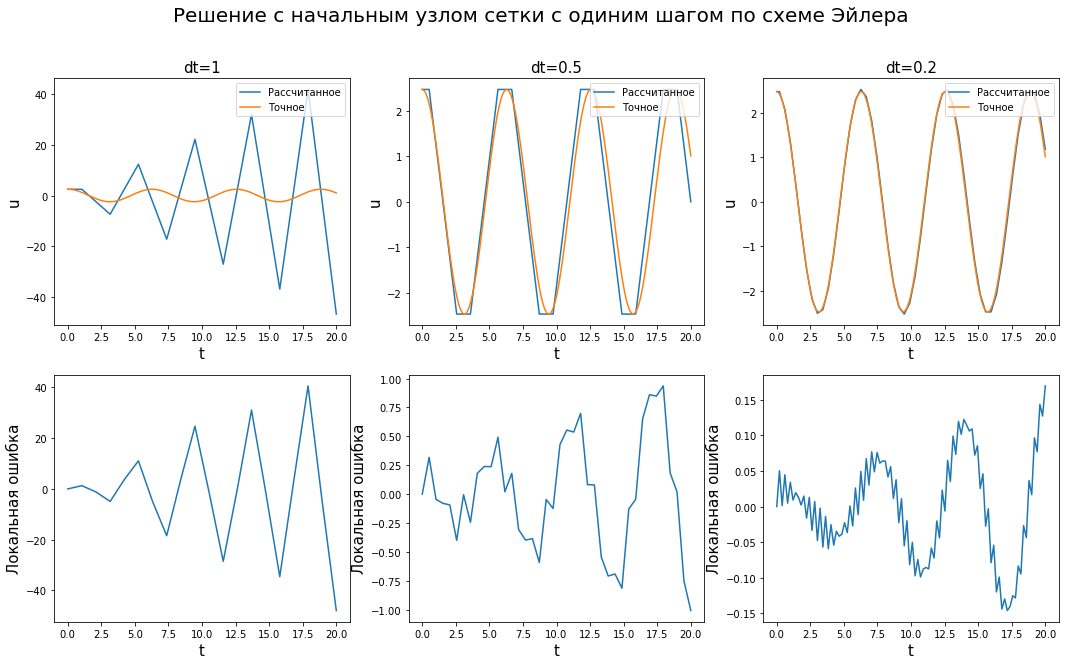

In [42]:
fig, axs = plt.subplots(2, 3)

fig.set_figheight(10)
fig.set_figwidth(18)
fig.suptitle("Решение с начальным узлом сетки с одиним шагом по схеме Эйлера", fontsize=20)
t_an=np.linspace(0,20,200)
u_an=2.47*np.cos(t_an)

dts=[1,0.5,0.2]
for j in range(3):
    dt=dts[j]
    
    t=np.linspace(0,20,int(20/dt))
    u=np.zeros(int(20/dt))
    v=np.zeros(int(20/dt))
    e=np.zeros(int(20/dt))
    
    u[0],v[0]=2.47,0
    u[1],v[1]=2.47,-2.47*dt  # с шагом по схеме Эйлера 
    
    for i in range(1,len(u)-1):
        u[i+1]=u[i-1]+v[i]*2*dt
        v[i+1]=v[i-1]-u[i]*2*dt
        
    e=u-2.47*np.cos(np.linspace(0,20,int(20/dt)))
    
    axs[0,j].plot(t,u,label='Рассчитанное')
    axs[0,j].set_xlabel('t',fontsize=15)
    axs[0,j].set_ylabel('u',fontsize=15)
    axs[0,j].plot(t_an,u_an,label='Точное')
    axs[0,j].set_title("dt="+str(dt),fontsize=15)
    axs[0,j].legend(loc=1)
    
    
    axs[1,j].plot(t,e,label='Рассчитанное')
    axs[1,j].set_xlabel('t',fontsize=15)
    axs[1,j].set_ylabel('Локальная ошибка',fontsize=15)

## 3) Решение с начальным узлом сетки по схеме Эйлера с шагом в 2 раза меньше шага основной сетки

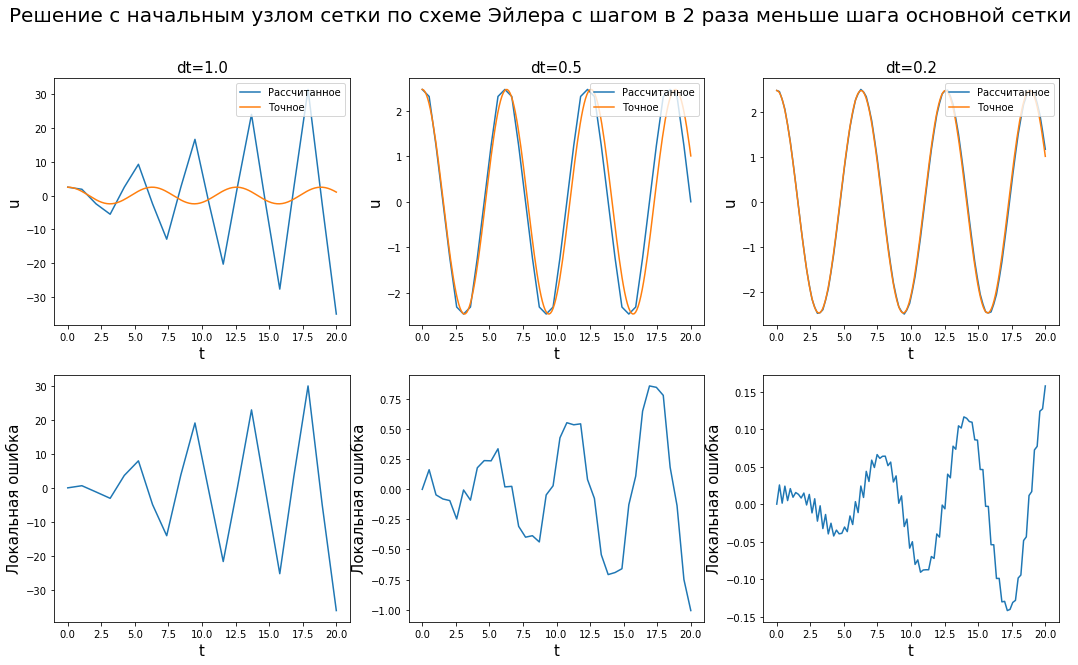

In [58]:
fig, axs = plt.subplots(2, 3)

fig.set_figheight(10)
fig.set_figwidth(18)
fig.suptitle("Решение с начальным узлом сетки по схеме Эйлера с шагом в 2 раза меньше шага основной сетки", fontsize=20)
t_an=np.linspace(0,20,200)
u_an=2.47*np.cos(t_an)

dts=np.array([1,0.5,0.2])
for j in range(3):
    dt=dts[j]
    
    t=np.linspace(0,20,int(20/dt))
    u=np.zeros(int(20/dt))
    v=np.zeros(int(20/dt))
    e=np.zeros(int(20/dt))
    
    u[0],v[0]=2.47,0
    u[1]=u[0]*(1-dt**2/4)
    v[1]=-u[0]*dt
 # с шагом вдвое меньше основной сетки по схеме Эйлера 
    
    for i in range(1,len(u)-1):
        u[i+1]=u[i-1]+v[i]*2*dt
        v[i+1]=v[i-1]-u[i]*2*dt
    #u=u[::2]
    e=u-2.47*np.cos(t)
    
    
    axs[0,j].plot(t,u,label='Рассчитанное')
    axs[0,j].set_xlabel('t',fontsize=15)
    axs[0,j].set_ylabel('u',fontsize=15)
    axs[0,j].plot(t_an,u_an,label='Точное')
    axs[0,j].set_title("dt="+str(dt),fontsize=15)
    axs[0,j].legend(loc=1)
    
    
    axs[1,j].plot(t,e,label='Расссчитанное')
    axs[1,j].set_xlabel('t',fontsize=15)
    axs[1,j].set_ylabel('Локальная ошибка',fontsize=15)